<a href="https://colab.research.google.com/github/Pmei0617/Mall-Traffic-Prediction/blob/main/Mall_Traffic_Prediction_SM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mall Traffic Prediction**

Self-guided project using data provided by Digital Marketing Analytics course at Wisconsin School of Business

###**Project Background**
Customer traffic is the most relevant KPI for mall managers, and we use it as the outcome variable when evaluating the effectiveness of mall campaigns. Malls lease retail spaces to independent stores, including department stores, brand chain stores, and privately-owned small businesses. The rent that malls collect from tenant stores is determined by factors such as square footage of the rental space, locations of the rental space, and customer traffic to the mall. While square footage and location are usually fixed, customer traffic is a variable factor that malls can take measures to improve. Increases in customer traffic strongly correlate with increases in mall revenue, as indicated by industry reports and as we found in an additional analysis. Unlike department stores that use sales as a main KPI, malls focus on bringing in customers, and it is up to each tenant store to convert shoppers visiting the mall into paying customers. Therefore, increasing customer traffic, which in turn drives up mall revenue, is a key objective of mall managers. 


###**Methodology**
Build ML models to predict 7 key metrics of mall related to traffic:
1. Daily mall traffic
2. Total visit
3. Total traffic of stores in **5** different categories


###**File Description**
**CASE_GROUP_PREDICT_SAMPLE**: Used to build and train ML models. File contains all independent variables and the 7 dependent variables. 

**CASE_GROUP_PREDICT_HOLD_DATA**: Used to pass into ML models in order to predict the 7 dependent variables. File constains all independent variables and no dependent variables.


###**Variable Description**
See PDF document *'Variable Description for Mall Traffic Prediction'* for details

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from scipy.stats import pearsonr

In [2]:
#Import files we need for training models and making predictions
from google.colab import files
uploaded = files.upload()

Saving CASE_GROUP_PREDICT_HOLD_DATA.csv to CASE_GROUP_PREDICT_HOLD_DATA.csv
Saving CASE_GROUP_PREDICT_SAMPLE.csv to CASE_GROUP_PREDICT_SAMPLE.csv


In [3]:
#Read in training and hold datasets
trn = pd.read_csv("CASE_GROUP_PREDICT_SAMPLE.csv")
hold = pd.read_csv("CASE_GROUP_PREDICT_HOLD_DATA.csv")

In [ ]:
trn.head()

,plazaid,date,ZoneID,CityID,CityLevel,BusinessStartDate,PlazaLevel2,PlazaType,BusiArea,TotalBuildingArea,...,day_weather2,day_wind,night_wind,total_visit,innum_1,innum_102,innum_103,innum_104,innum_1000290,innum
0,45,2014-01-01,8,179,1498,27AUG11:00:00:00,A?,2,84878.4,135315.2,...,good,1,1,164712.0,37559.0,43028.0,43766.0,26319.0,1371.0,41365
1,45,2014-01-02,8,179,1498,27AUG11:00:00:00,A?,2,84878.4,135315.2,...,good,1,1,139543.0,13929.0,99360.0,12081.0,9025.0,719.0,29620
2,45,2014-01-03,8,179,1498,27AUG11:00:00:00,A?,2,84878.4,135315.2,...,good,1,1,162541.0,19748.0,115348.0,13329.0,8029.0,858.0,33238
3,45,2014-01-04,8,179,1498,27AUG11:00:00:00,A?,2,84878.4,135315.2,...,good,1,1,177054.0,18193.0,121325.0,17298.0,12004.0,1087.0,32870
4,45,2014-01-05,8,179,1498,27AUG11:00:00:00,A?,2,84878.4,135315.2,...,good,1,1,202265.0,22348.0,133857.0,22607.0,15105.0,1276.0,39040


In [ ]:
hold.head()

,plazaid,date,ZoneID,CityID,CityLevel,BusinessStartDate,PlazaLevel2,PlazaType,BusiArea,TotalBuildingArea,...,holiday7,new_year_eve,holiday8,workingday_makeup,day_temp,night_temp,day_weather,day_weather2,day_wind,night_wind
0,45,7/1/2016,8,179,1498,27AUG11:00:00:00,A?,2,84878.4,135315.2,...,0,0,0,0,27,23,rain_storm,big_trouble,1,1
1,45,7/2/2016,8,179,1498,27AUG11:00:00:00,A?,2,84878.4,135315.2,...,0,0,0,0,26,23,heavy_rain,med_trouble,1,1
2,45,7/3/2016,8,179,1498,27AUG11:00:00:00,A?,2,84878.4,135315.2,...,0,0,0,0,27,24,med_rain,small_trouble,1,1
3,45,7/4/2016,8,179,1498,27AUG11:00:00:00,A?,2,84878.4,135315.2,...,0,0,0,0,26,22,heavy_rain,med_trouble,1,1
4,45,7/5/2016,8,179,1498,27AUG11:00:00:00,A?,2,84878.4,135315.2,...,0,0,0,0,27,23,heavy_rain,med_trouble,1,1


In [4]:
print(trn.shape)
print(hold.head().shape)

(37141, 41)
(5, 34)


In [5]:
# Preview summary for the entire data
trn.describe()

,ZoneID,CityID,CityLevel,PlazaType,BusiArea,TotalBuildingArea,BusinessBuildingArea,year,month,day,...,night_temp,day_wind,night_wind,total_visit,innum_1,innum_102,innum_103,innum_104,innum_1000290,innum
count,37141.000000,37141.000000,37141.000000,37141.000000,37141.000000,37141.000000,37141.000000,37141.000000,37141.000000,37141.000000,...,37128.000000,37141.000000,37141.000000,37136.000000,37136.000000,37136.000000,37136.000000,37136.000000,37136.000000,37141.000000
mean,20.091462,170.791820,1498.175682,1.675668,86788.384158,133525.097138,66978.455895,2016.177755,6.339409,15.732587,...,10.951438,1.087989,1.094397,82648.116598,21847.390160,23222.329034,12340.987667,14451.935884,1151.492406,39393.040279
std,15.470613,93.096432,0.380554,0.969474,11389.264402,15295.806774,10161.832627,1.454890,3.507103,8.795860,...,12.627355,0.286684,0.423560,42917.782712,15259.449476,14048.354148,8648.616866,9804.534291,1348.304248,15960.551839
min,2.000000,47.000000,1498.000000,1.000000,66895.200000,96421.600000,50815.200000,2014.000000,1.000000,1.000000,...,-35.000000,1.000000,1.000000,937.000000,0.000000,110.000000,0.000000,17.000000,0.000000,2788.000000
25%,6.000000,81.000000,1498.000000,1.000000,81070.400000,125556.800000,60104.000000,2015.000000,3.000000,8.000000,...,4.000000,1.000000,1.000000,53532.000000,10926.000000,15115.000000,6835.000000,8705.000000,563.000000,28153.000000
50%,13.000000,179.000000,1498.000000,1.000000,87414.400000,135315.200000,67050.400000,2016.000000,6.000000,16.000000,...,14.000000,1.000000,1.000000,73574.000000,18230.000000,20380.000000,10172.000000,12059.000000,932.000000,36282.000000
75%,32.000000,226.000000,1498.000000,3.000000,94279.200000,141040.000000,70707.200000,2017.000000,9.000000,23.000000,...,21.000000,1.000000,1.000000,103207.250000,29643.250000,28056.000000,15626.250000,17892.000000,1425.250000,47483.000000
max,48.000000,373.000000,1499.000000,4.000000,117983.200000,168256.000000,95799.200000,2018.000000,12.000000,31.000000,...,31.000000,3.000000,3.000000,616600.000000,186823.000000,298683.000000,204589.000000,300349.000000,119094.000000,221590.000000


In [9]:
# Let look at the summary for our 7 response variables
trn.iloc[:,-7:].describe()

,total_visit,innum_1,innum_102,innum_103,innum_104,innum_1000290,innum
count,37136.000000,37136.000000,37136.000000,37136.000000,37136.000000,37136.000000,37141.000000
mean,82648.116598,21847.390160,23222.329034,12340.987667,14451.935884,1151.492406,39393.040279
std,42917.782712,15259.449476,14048.354148,8648.616866,9804.534291,1348.304248,15960.551839
min,937.000000,0.000000,110.000000,0.000000,17.000000,0.000000,2788.000000
25%,53532.000000,10926.000000,15115.000000,6835.000000,8705.000000,563.000000,28153.000000
50%,73574.000000,18230.000000,20380.000000,10172.000000,12059.000000,932.000000,36282.000000
75%,103207.250000,29643.250000,28056.000000,15626.250000,17892.000000,1425.250000,47483.000000
max,616600.000000,186823.000000,298683.000000,204589.000000,300349.000000,119094.000000,221590.000000


In [10]:
#We will store plazaid and date in separate varaibles and drop them in train and hold set as we don't need it in building our prediction model. We will also drop date because we have variables year, month and day. 
trn_plazaid = trn['plazaid']
hold_plazaid = hold['plazaid']

trn_date = trn['date']
hold_date = hold['date']

trn = trn.drop(['plazaid','date'], axis=1)
hold = hold.drop(['plazaid','date'], axis=1)

In [11]:
#Check if there are any missing values
trn.isnull().sum()

ZoneID                   0
CityID                   0
CityLevel                0
BusinessStartDate        0
PlazaLevel2              0
PlazaType                0
BusiArea                 0
TotalBuildingArea        0
BusinessBuildingArea     0
year                     0
month                    0
day                      0
weekday                  0
holiday1                 0
holiday9                 0
holiday5                 0
holiday4                 0
holiday2                 0
holiday10                0
holiday3                 0
holiday11                0
holiday6                 0
holiday7                 0
new_year_eve             0
holiday8                 0
workingday_makeup        0
day_temp                13
night_temp              13
day_weather             13
day_weather2            13
day_wind                 0
night_wind               0
total_visit              5
innum_1                  5
innum_102                5
innum_103                5
innum_104                5
i

In [12]:
hold.isnull().sum()

ZoneID                  0
CityID                  0
CityLevel               0
BusinessStartDate       0
PlazaLevel2             0
PlazaType               0
BusiArea                0
TotalBuildingArea       0
BusinessBuildingArea    0
year                    0
month                   0
day                     0
weekday                 0
holiday1                0
holiday9                0
holiday5                0
holiday4                0
holiday2                0
holiday10               0
holiday3                0
holiday11               0
holiday6                0
holiday7                0
new_year_eve            0
holiday8                0
workingday_makeup       0
day_temp                0
night_temp              0
day_weather             0
day_weather2            0
day_wind                0
night_wind              0
dtype: int64

In [13]:
#There are 18 rows with null values in train set
trn_null_rows = trn[trn.isnull().any(axis=1)]
trn_null_rows.shape

(18, 39)

In [14]:
#There are 0 rows with null values in hold set
hold_null_rows = hold[hold.isnull().any(axis=1)]
hold_null_rows.shape

(0, 32)

There is only a few rows with null values in train set. We will drop them since we have **37141** train observations which is sufficient to build our model. 

**Note**: Actual approach to dealing with null variables will depend on business objective. In the scope of this project, I will go ahead and remove rows with null values

In [15]:
#Drop null values in train set
trn.dropna(inplace=True)
trn.isnull().sum()

ZoneID                  0
CityID                  0
CityLevel               0
BusinessStartDate       0
PlazaLevel2             0
PlazaType               0
BusiArea                0
TotalBuildingArea       0
BusinessBuildingArea    0
year                    0
month                   0
day                     0
weekday                 0
holiday1                0
holiday9                0
holiday5                0
holiday4                0
holiday2                0
holiday10               0
holiday3                0
holiday11               0
holiday6                0
holiday7                0
new_year_eve            0
holiday8                0
workingday_makeup       0
day_temp                0
night_temp              0
day_weather             0
day_weather2            0
day_wind                0
night_wind              0
total_visit             0
innum_1                 0
innum_102               0
innum_103               0
innum_104               0
innum_1000290           0
innum       

# Exploratory data analysis

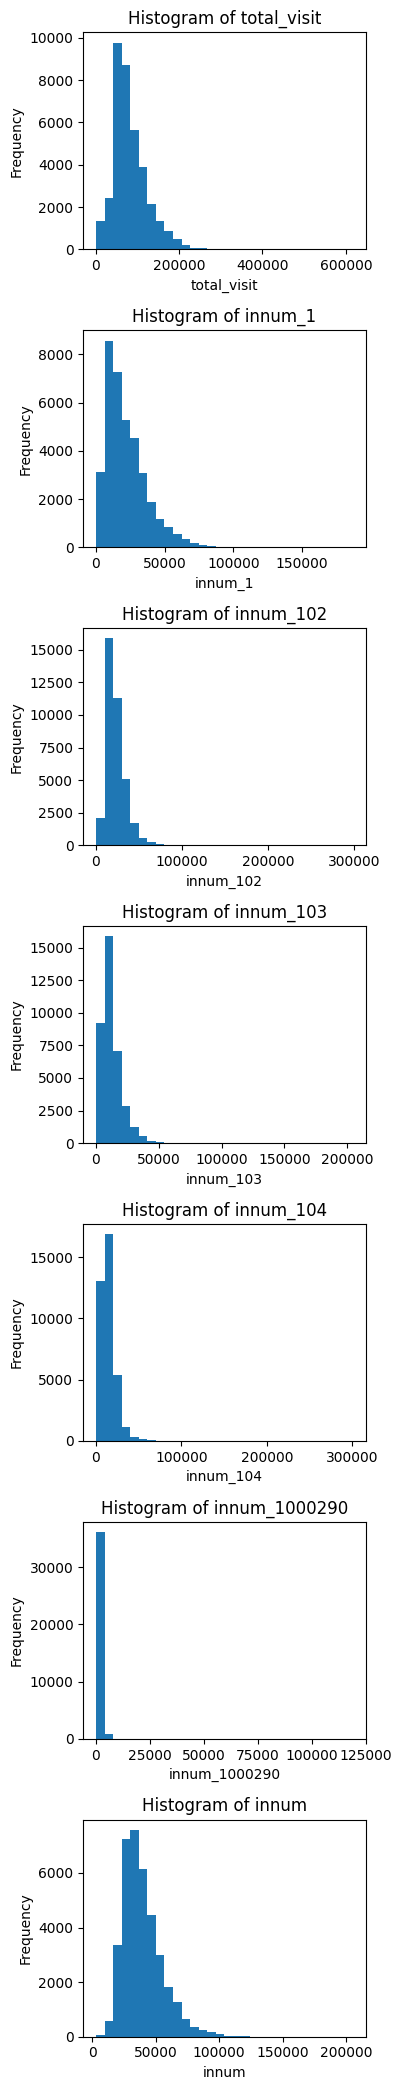

In [22]:
# Check out the 7 response variables' distribution
# define the columns of interest
cols_of_interest = ['total_visit', 'innum_1', 'innum_102', 'innum_103', 'innum_104', 'innum_1000290', 'innum']

# create subplots
fig, axs = plt.subplots(nrows=len(cols_of_interest), ncols=1, figsize=(4, 3*len(cols_of_interest)))

# loop through the columns and generate histograms
for i, col in enumerate(cols_of_interest):
    axs[i].hist(trn[col], bins=30)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

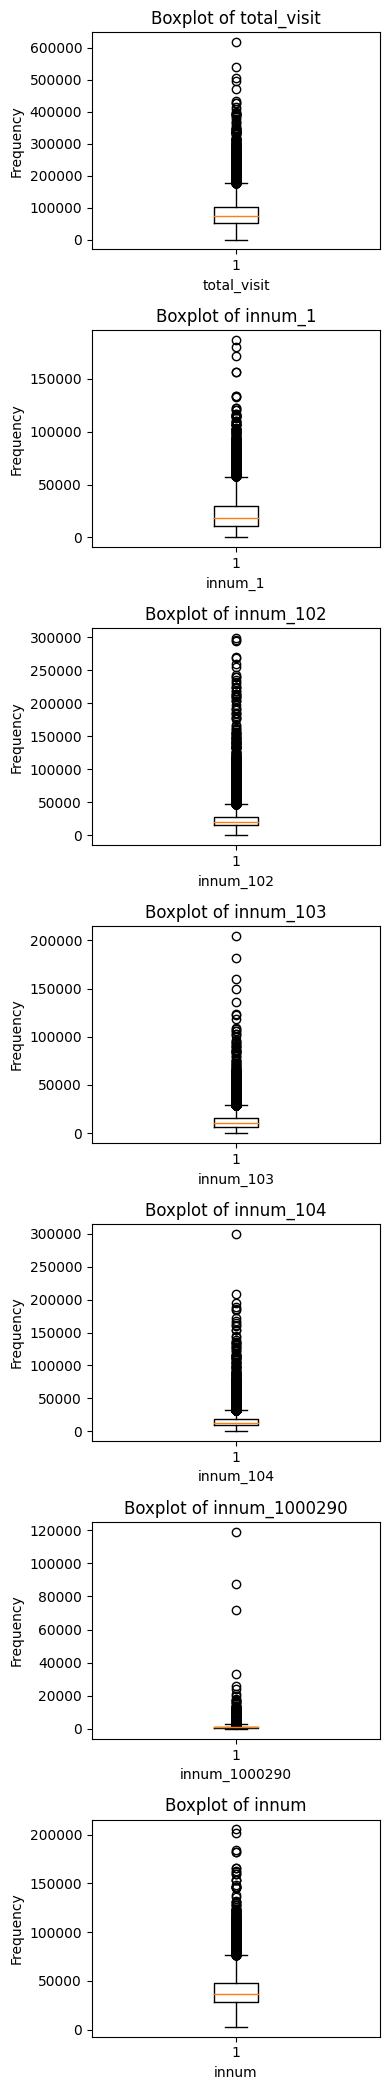

In [28]:
# We will use boxplots to better visualize the outliers, median and the 25-75 quantile range
cols_of_interest = ['total_visit', 'innum_1', 'innum_102', 'innum_103', 'innum_104', 'innum_1000290', 'innum']

# create subplots
fig, axs = plt.subplots(nrows=len(cols_of_interest), ncols=1, figsize=(4, 3*len(cols_of_interest)))

# loop through the columns and generate histograms
for i, col in enumerate(cols_of_interest):
    axs[i].boxplot(trn[col])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

We can see that all response variables' distribution are right skewed with extreme outliers in the upper end. Using boxplot, we can see that these outliers are very prominent for each response variables 

In [29]:
#Display the column names
print(trn.columns)

Index(['ZoneID', 'CityID', 'CityLevel', 'BusinessStartDate', 'PlazaLevel2',
       'PlazaType', 'BusiArea', 'TotalBuildingArea', 'BusinessBuildingArea',
       'year', 'month', 'day', 'weekday', 'holiday1', 'holiday9', 'holiday5',
       'holiday4', 'holiday2', 'holiday10', 'holiday3', 'holiday11',
       'holiday6', 'holiday7', 'new_year_eve', 'holiday8', 'workingday_makeup',
       'day_temp', 'night_temp', 'day_weather', 'day_weather2', 'day_wind',
       'night_wind', 'total_visit', 'innum_1', 'innum_102', 'innum_103',
       'innum_104', 'innum_1000290', 'innum'],
      dtype='object')


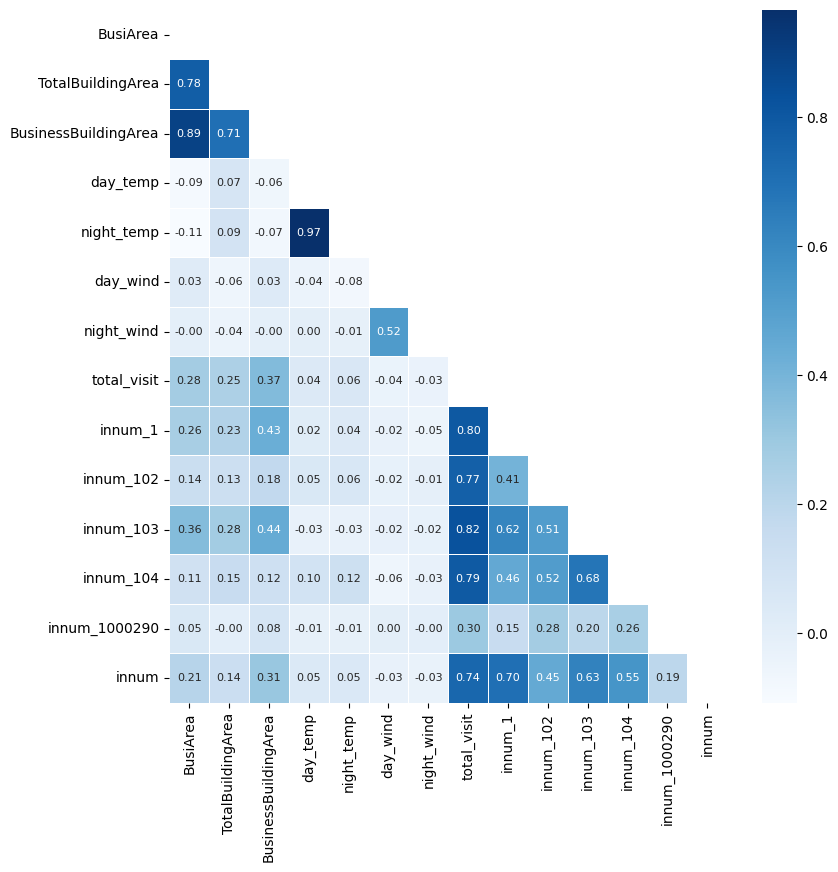

In [48]:
#Generate correlation matrix to see the relationship between each independent variable with our dependant variables
numerical_cols = ['BusiArea', 'TotalBuildingArea', 'BusinessBuildingArea',
       'day_temp', 'night_temp', 'day_wind', 'night_wind', 'total_visit', 
       'innum_1', 'innum_102', 'innum_103', 'innum_104', 'innum_1000290', 'innum']
 
df_corr = trn[numerical_cols]
corr_matrix = df_corr.corr()

# create a mask to hide the upper triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# create a heatmap of the lower triangle of the correlation matrix using seaborn
plt.figure(figsize=(9,9))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='Blues', linewidths=0.5, annot_kws={"size": 8} )

# show the plot
plt.show()

No particular strong correlation were shown between our independent variables and our response variables. Moderate positive correlation was observed in **BusinessBuildingArea** and **BusiArea**. Slight positive correlation was observed in **TotalBuildingArea**. Based on this, we can infer that the size of malls is positively correlated with traffic.

Of all the 7 response variables, **innum_1000290** (Service store category) came out to be the least correlated with the independent variables. Even its correlation with the other traffic response variables are particular low. We will keep this in mind as we build our model.


We can check to see if our correlation coefficients between each independent variables and our response variables are signiciant using pearson r test

In [62]:
# calculate the correlation coefficient and p-values corresponding to total_visit
corr_matrix = df_corr.corr(method='pearson')
p_values = df_corr.corr(method=lambda x, y: pearsonr(x, y)[1])

# select the row of the correlation matrix that corresponds to total_visit
corr_with_total_visit = corr_matrix['total_visit'].drop('total_visit')

# combine the correlation values and p-values into a single dataframe
corr_df = pd.DataFrame({'correlation': corr_with_total_visit, 'p-value': p_values['total_visit'].drop(['total_visit','innum_1','innum_102','innum_103','innum_104','innum_1000290','innum'])})

# display the results where p-value are less than 0.05
print(corr_df[corr_df['p-value']<0.05])

                      correlation       p-value
BusiArea                 0.275220  0.000000e+00
BusinessBuildingArea     0.369860  0.000000e+00
TotalBuildingArea        0.248530  0.000000e+00
day_temp                 0.042903  1.341106e-16
day_wind                -0.036446  2.153098e-12
night_temp               0.059919  6.988910e-31
night_wind              -0.033919  6.275283e-11


In [63]:
# calculate the correlation coefficient and p-values corresponding to innum
corr_matrix = df_corr.corr(method='pearson')
p_values = df_corr.corr(method=lambda x, y: pearsonr(x, y)[1])

# select the row of the correlation matrix that corresponds to innum
corr_with_innum = corr_matrix['innum'].drop('innum')

# combine the correlation values and p-values into a single dataframe
corr_df = pd.DataFrame({'correlation': corr_with_innum, 'p-value': p_values['innum'].drop(['total_visit','innum_1','innum_102','innum_103','innum_104','innum_1000290','innum'])})

# display the results where p-value are less than 0.05
print(corr_df[corr_df['p-value']<0.05])

                      correlation        p-value
BusiArea                 0.214610   0.000000e+00
BusinessBuildingArea     0.308993   0.000000e+00
TotalBuildingArea        0.135277  4.064396e-151
day_temp                 0.045412   2.060901e-18
day_wind                -0.026442   3.480245e-07
night_temp               0.051023   7.805235e-23
night_wind              -0.029076   2.104374e-08


The positive correlation between innum (traffic) and BusinessBuildingArea is significant and so is that for BusiArea. The correlation for every other numerical variables are significant as well but they all have relatively weak correlation compared to BusinessBuildingArea and BusiArea. Based on these results, we can infer that greater business building areas drives more traffic. Similarly for greater business area and total building area but the effects are less than that of business building area.

In [66]:
# calculate the correlation coefficient and p-values corresponding to innum_1000290
corr_matrix = df_corr.corr(method='pearson')
p_values = df_corr.corr(method=lambda x, y: pearsonr(x, y)[1])

# select the row of the correlation matrix that corresponds to innum
corr_with_innum_1000290 = corr_matrix['innum_1000290'].drop('innum_1000290')

# combine the correlation values and p-values into a single dataframe
corr_df = pd.DataFrame({'correlation': corr_with_innum_1000290, 'p-value': p_values['innum_1000290'].drop(['total_visit','innum_1','innum_102','innum_103','innum_104','innum_1000290','innum'])})

# display the results where p-value are less than 0.05
print(corr_df[corr_df['p-value']<0.05])

                      correlation       p-value
BusiArea                 0.053446  6.708632e-25
BusinessBuildingArea     0.079979  9.656971e-54
day_temp                -0.011256  3.011038e-02
night_temp              -0.011583  2.563147e-02


Regardless of the weak correlation innum_1000290 has with our numerical independent variables, the correlation coefficients still came out to be significant.

# Data cleaning and transformation for train set

In [67]:
trn.head(3)

,ZoneID,CityID,CityLevel,BusinessStartDate,PlazaLevel2,PlazaType,BusiArea,TotalBuildingArea,BusinessBuildingArea,year,...,day_weather2,day_wind,night_wind,total_visit,innum_1,innum_102,innum_103,innum_104,innum_1000290,innum
0,8,179,1498,27AUG11:00:00:00,A?,2,84878.4,135315.2,69157.6,2014,...,good,1,1,164712.0,37559.0,43028.0,43766.0,26319.0,1371.0,41365
1,8,179,1498,27AUG11:00:00:00,A?,2,84878.4,135315.2,69157.6,2014,...,good,1,1,139543.0,13929.0,99360.0,12081.0,9025.0,719.0,29620
2,8,179,1498,27AUG11:00:00:00,A?,2,84878.4,135315.2,69157.6,2014,...,good,1,1,162541.0,19748.0,115348.0,13329.0,8029.0,858.0,33238


In [68]:
trn.dtypes

ZoneID                    int64
CityID                    int64
CityLevel                 int64
BusinessStartDate        object
PlazaLevel2              object
PlazaType                 int64
BusiArea                float64
TotalBuildingArea       float64
BusinessBuildingArea    float64
year                      int64
month                     int64
day                       int64
weekday                   int64
holiday1                  int64
holiday9                  int64
holiday5                  int64
holiday4                  int64
holiday2                  int64
holiday10                 int64
holiday3                  int64
holiday11                 int64
holiday6                  int64
holiday7                  int64
new_year_eve              int64
holiday8                  int64
workingday_makeup         int64
day_temp                float64
night_temp              float64
day_weather              object
day_weather2             object
day_wind                  int64
night_wi

In [69]:
trn.iloc[:,13:26]

,holiday1,holiday9,holiday5,holiday4,holiday2,holiday10,holiday3,holiday11,holiday6,holiday7,new_year_eve,holiday8,workingday_makeup
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37136,0,0,0,0,0,0,0,0,0,0,0,0,0
37137,0,0,0,0,0,0,0,0,0,0,0,0,0
37138,0,0,0,0,0,0,0,0,0,0,0,0,0
37139,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
#Convert columns to their desired data types
trn.iloc[:,13:26] = trn.iloc[:,13:26].astype("bool")

In [71]:
# perform one-hot encoding for PlazaType
one_hot = pd.get_dummies(trn['PlazaType'])

# add the one-hot encoded columns to the original dataframe
trn = pd.concat([trn, one_hot],axis=1)

# drop the original categorical column
trn = trn.drop('PlazaType', axis=1)

In [72]:
# perform one-hot encoding for PlazaLevel2
one_hot = pd.get_dummies(trn['PlazaLevel2'])

# add the one-hot encoded columns to the original dataframe
trn = pd.concat([trn, one_hot],axis=1)

# drop the original categorical column
trn = trn.drop('PlazaLevel2', axis=1)

In [73]:
# perform one-hot encoding for day_weather
one_hot = pd.get_dummies(trn['day_weather'])

# add the one-hot encoded columns to the original dataframe
trn = pd.concat([trn, one_hot],axis=1)

# drop the original categorical column
trn = trn.drop('day_weather', axis=1)

In [74]:
# perform one-hot encoding for day_weather2
one_hot = pd.get_dummies(trn['day_weather2'])

# add the one-hot encoded columns to the original dataframe
trn = pd.concat([trn, one_hot],axis=1)

# drop the original categorical column
trn = trn.drop('day_weather2', axis=1)

In [75]:
# Convert date strings to datetime objects
trn['BusinessStartDate'] = pd.to_datetime(trn['BusinessStartDate'], format='%d%b%y:%H:%M:%S')

# Extract year, month, day, hour, minute, second, and microsecond components
trn['businessyear'] = trn['BusinessStartDate'].dt.year
trn['businessmonth'] = trn['BusinessStartDate'].dt.month
trn['businessday'] = trn['BusinessStartDate'].dt.day
trn['businesshour'] = trn['BusinessStartDate'].dt.hour
trn['businessminute'] = trn['BusinessStartDate'].dt.minute
trn['businesssecond'] = trn['BusinessStartDate'].dt.second
trn['businessmicrosecond'] = trn['BusinessStartDate'].dt.microsecond

In [76]:
# Drop columns we do not need
trn = trn.drop(['BusinessStartDate','businesshour','businessminute','businesssecond','businessmicrosecond'], axis=1)


In [77]:
# Convert year, month, day and weekday to factor type
trn['year'] = trn['year'].astype(object)
trn['month'] = trn['month'].astype(object)
trn['day'] = trn['day'].astype(object)
trn['weekday'] = trn['weekday'].astype(object)
trn['businessyear'] = trn['businessyear'].astype(object)
trn['businessmonth'] = trn['businessmonth'].astype(object)
trn['businessday'] = trn['businessday'].astype(object)

In [78]:
trn.dtypes

ZoneID                 int64
CityID                 int64
CityLevel              int64
BusiArea             float64
TotalBuildingArea    float64
                      ...   
small_trouble          uint8
special                uint8
businessyear          object
businessmonth         object
businessday           object
Length: 68, dtype: object

In [79]:
# Convert all column to string type because the model we will build later only takes in string type
trn.columns = trn.columns.astype(str)

In [80]:
trn.dtypes

ZoneID                 int64
CityID                 int64
CityLevel              int64
BusiArea             float64
TotalBuildingArea    float64
                      ...   
small_trouble          uint8
special                uint8
businessyear          object
businessmonth         object
businessday           object
Length: 68, dtype: object

# Data cleaning and transformation for hold dataset

In [82]:
hold.iloc[:,13:26]

,holiday1,holiday9,holiday5,holiday4,holiday2,holiday10,holiday3,holiday11,holiday6,holiday7,new_year_eve,holiday8,workingday_makeup
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,0,0,0,0,0,0,0,0,0,0,0,0,0
4407,0,0,0,0,0,0,0,0,0,0,0,0,0
4408,0,0,0,0,0,0,0,0,0,0,0,0,0
4409,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
#Convert columns to their desired data types
hold.iloc[:,13:26] = hold.iloc[:,13:26].astype("bool")

In [84]:
# perform one-hot encoding for PlazaType
one_hot = pd.get_dummies(hold['PlazaType'])

# add the one-hot encoded columns to the original dataframe
hold = pd.concat([hold, one_hot],axis=1)

# drop the original categorical column
hold = hold.drop('PlazaType', axis=1)

In [85]:
# perform one-hot encoding for PlazaLevel2
one_hot = pd.get_dummies(hold['PlazaLevel2'])

# add the one-hot encoded columns to the original dataframe
hold = pd.concat([hold, one_hot],axis=1)

# drop the original categorical column
hold = hold.drop('PlazaLevel2', axis=1)

In [86]:
# perform one-hot encoding for day_weather
one_hot = pd.get_dummies(hold['day_weather'])

# add the one-hot encoded columns to the original dataframe
hold = pd.concat([hold, one_hot],axis=1)

# drop the original categorical column
hold = hold.drop('day_weather', axis=1)

In [87]:
# perform one-hot encoding for day_weather2
one_hot = pd.get_dummies(hold['day_weather2'])

# add the one-hot encoded columns to the original dataframe
hold = pd.concat([hold, one_hot],axis=1)

# drop the original categorical column
hold = hold.drop('day_weather2', axis=1)

In [88]:
# Convert date strings to datetime objects
hold['BusinessStartDate'] = pd.to_datetime(hold['BusinessStartDate'], format='%d%b%y:%H:%M:%S')

# Extract year, month, day, hour, minute, second, and microsecond components
hold['businessyear'] = hold['BusinessStartDate'].dt.year
hold['businessmonth'] = hold['BusinessStartDate'].dt.month
hold['businessday'] = hold['BusinessStartDate'].dt.day
hold['businesshour'] = hold['BusinessStartDate'].dt.hour
hold['businessminute'] = hold['BusinessStartDate'].dt.minute
hold['businesssecond'] = hold['BusinessStartDate'].dt.second
hold['businessmicrosecond'] = hold['BusinessStartDate'].dt.microsecond

In [89]:
hold = hold.drop(['BusinessStartDate','businesshour','businessminute','businesssecond','businessmicrosecond'], axis=1)

In [90]:
# Convert year, month, day and weekday to factor type
hold['year'] = hold['year'].astype(object)
hold['month'] = hold['month'].astype(object)
hold['day'] = hold['day'].astype(object)
hold['weekday'] = hold['weekday'].astype(object)
hold['businessyear'] = hold['businessyear'].astype(object)
hold['businessmonth'] = hold['businessmonth'].astype(object)
hold['businessday'] = hold['businessday'].astype(object)

In [91]:
hold.columns = hold.columns.astype(str)

### Check to see that after transformation, train and test datasets have same column indices other than the 7 response variables

In [92]:
print(trn.columns)
print(hold.columns)

Index(['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildingArea',
       'BusinessBuildingArea', 'year', 'month', 'day', 'weekday', 'holiday1',
       'holiday9', 'holiday5', 'holiday4', 'holiday2', 'holiday10', 'holiday3',
       'holiday11', 'holiday6', 'holiday7', 'new_year_eve', 'holiday8',
       'workingday_makeup', 'day_temp', 'night_temp', 'day_wind', 'night_wind',
       'total_visit', 'innum_1', 'innum_102', 'innum_103', 'innum_104',
       'innum_1000290', 'innum', '1', '2', '3', '4', 'A?', 'B?', 'C?',
       'Overcast', 'Thunder', 'cloudy', 'dust', 'foggy', 'haze', 'heavy_rain',
       'heavy_snow', 'med_rain', 'med_snow', 'rain_storm', 'small_rain',
       'small_snow', 'snow_rain', 'snow_storm', 'sunny', 'big_trouble', 'fair',
       'good', 'huge_trouble', 'little_trouble', 'med_trouble',
       'small_trouble', 'special', 'businessyear', 'businessmonth',
       'businessday'],
      dtype='object')
Index(['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildin

In [93]:
# get column names as sets
trn_colnames = set(trn.columns)
hold_colnames = set(hold.columns)

# find non-duplicate column names
non_dup_cols = trn_colnames.symmetric_difference(hold_colnames)

print(non_dup_cols)

{'huge_trouble', 'innum_102', 'dust', 'snow_storm', 'total_visit', 'innum', 'innum_103', 'innum_1000290', 'innum_1', 'innum_104'}


We see that there are 10 different columns between train and test dataset. 7 of those will be our response variable used to build our model. **"dust"**, **"snow_storm"**, **"hug_trouble"** are the 3 columns that are missing from test set after performing one-hot encoding. We will manually create 3 columns for each of these 3 variables with value of 0 since there are no records for them.

In [94]:
#Column sequence needs to be the same for both training and testing set in order for our model to process
hold.insert(loc=37, column='dust', value=0)
hold.insert(loc=48, column='snow_storm', value=0)
hold.insert(loc=53, column='huge_trouble', value=0)

print(trn.shape)
print(hold.shape)

(37123, 68)
(4411, 61)


In [98]:
#Check column sequence
print(trn.columns)
print(hold.columns)

Index(['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildingArea',
       'BusinessBuildingArea', 'year', 'month', 'day', 'weekday', 'holiday1',
       'holiday9', 'holiday5', 'holiday4', 'holiday2', 'holiday10', 'holiday3',
       'holiday11', 'holiday6', 'holiday7', 'new_year_eve', 'holiday8',
       'workingday_makeup', 'day_temp', 'night_temp', 'day_wind', 'night_wind',
       'total_visit', 'innum_1', 'innum_102', 'innum_103', 'innum_104',
       'innum_1000290', 'innum', '1', '2', '3', '4', 'A?', 'B?', 'C?',
       'Overcast', 'Thunder', 'cloudy', 'dust', 'foggy', 'haze', 'heavy_rain',
       'heavy_snow', 'med_rain', 'med_snow', 'rain_storm', 'small_rain',
       'small_snow', 'snow_rain', 'snow_storm', 'sunny', 'big_trouble', 'fair',
       'good', 'huge_trouble', 'little_trouble', 'med_trouble',
       'small_trouble', 'special', 'businessyear', 'businessmonth',
       'businessday'],
      dtype='object')
Index(['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildin

# Building random forest regression models (Part 1)

### Create training and testing set for response variable **innum**. Build a random forest model to predict **innum** for our test dataset "CASE_GROUP_PREDICT_HOLD_DATA.csv"

In [148]:
# Prepare data for training and testing model
X = trn.drop(['total_visit','innum_1','innum_102','innum_103','innum_104','innum_1000290','innum'], axis=1)  # Independent variables
y = trn['innum']  # Response variable

# Splitting the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (29698, 61)
Shape of X_test: (7425, 61)
Shape of y_train: (29698,)
Shape of y_test: (7425,)


In [ ]:
"""
# Use rolling window method to split train and test time series data. This could potential capture seasonality and accounts for pattern and trends based on the window size specified.
# We have daily data in each row that spans across 5 years. Here we set window size to 60 meaning the prediction is based on patterns and trends over the past 2 months.

# Set the window size
window_size = 60

# Initialize lists to store the training and testing sets
X_train, X_test, y_train, y_test = [], [], [], []

# Loop through the data to create the training and testing sets
for i in range(window_size, len(trn)):
    # Split the data into the current training and testing sets
    X_train_curr = trn.iloc[i-window_size:i, :]
    X_test_curr = trn.iloc[i:i+1, :]
    y_train_curr = trn.iloc[i-window_size:i, :]['innum']
    y_test_curr = trn.iloc[i:i+1, :]['innum']
    
    # Append the current sets to the overall sets
    X_train.append(X_train_curr)
    X_test.append(X_test_curr)
    y_train.append(y_train_curr)
    y_test.append(y_test_curr)

# Concatenate the training and testing sets
X_train = pd.concat(X_train)
X_test = pd.concat(X_test)
y_train = pd.concat(y_train)
y_test = pd.concat(y_test)
"""

Before we building our random forest model, we will first identify the optimal number of trees using cross-validation scores

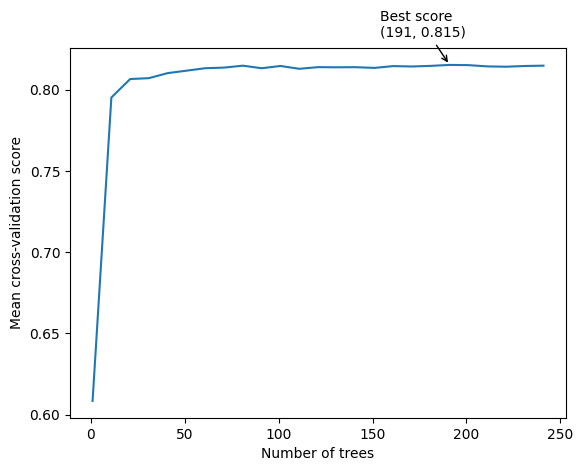

In [97]:
# Define a range of values for the number of trees to explore
n_trees_range = np.arange(1, 251, 10)

# Calculate the cross-validation scores for each value of n_trees using a random forest regressor
cv_scores = []
for n_trees in n_trees_range:
    rf_model = RandomForestRegressor(n_estimators=n_trees)
    scores = cross_val_score(rf_model, X_train, y_train, cv=5)
    cv_scores.append(np.mean(scores))

# Find the index of the highest score
best_idx = np.argmax(cv_scores)

# Plot the mean cross-validation score as a function of the number of trees
plt.plot(n_trees_range, cv_scores)
plt.xlabel('Number of trees')
plt.ylabel('Mean cross-validation score')

# Add an annotation for the highest point
best_n_trees = n_trees_range[best_idx]
best_score = cv_scores[best_idx]
plt.annotate(f'Best score\n({best_n_trees}, {best_score:.3f})',
             xy=(best_n_trees, best_score), xycoords='data',
             xytext=(-50, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

plt.show()

The optimal number of estimators (trees) for our train data is **191**.

In [149]:
# Create a random forest model with 191 trees, the optimal number of trees based on mean cross validation score
rf_model = RandomForestRegressor(n_estimators=191, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [150]:
# Calculate the R-squared value of the predictions
r_squared = r2_score(y_test, y_pred)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mse)

# Calculate the MAE on the test data
mae = mean_absolute_error(y_test, y_pred)

print('R-squared:', r_squared)
print('Root mean squared error', rmse)
print('Mean Absolute Error:', mae)

R-squared: 0.8434428388369322
Root mean squared error 6285.4069221398795
Mean Absolute Error: 3766.6881858726883


In [151]:
# We can validate the performance of our RF model by calculating MAE%. By standard, a MAE% of <20% is a indicator of a good model.
# Calculate MAE%
mae_pct = (mae/np.mean(y_test))*100
mae_pct

9.545255395447088

In [152]:
# Store performance metrics for model comparison later
innum_r_squared_1 = r_squared
innum_rmse_1 = rmse
innum_mae_pct_1 = mae_pct

In [153]:
#Check to see column index in both train and test data are in the same order
print(X_train.columns)
print(hold.columns)

Index(['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildingArea',
       'BusinessBuildingArea', 'year', 'month', 'day', 'weekday', 'holiday1',
       'holiday9', 'holiday5', 'holiday4', 'holiday2', 'holiday10', 'holiday3',
       'holiday11', 'holiday6', 'holiday7', 'new_year_eve', 'holiday8',
       'workingday_makeup', 'day_temp', 'night_temp', 'day_wind', 'night_wind',
       '1', '2', '3', '4', 'A?', 'B?', 'C?', 'Overcast', 'Thunder', 'cloudy',
       'dust', 'foggy', 'haze', 'heavy_rain', 'heavy_snow', 'med_rain',
       'med_snow', 'rain_storm', 'small_rain', 'small_snow', 'snow_rain',
       'snow_storm', 'sunny', 'big_trouble', 'fair', 'good', 'huge_trouble',
       'little_trouble', 'med_trouble', 'small_trouble', 'special',
       'businessyear', 'businessmonth', 'businessday'],
      dtype='object')
Index(['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildingArea',
       'BusinessBuildingArea', 'year', 'month', 'day', 'weekday', 'holiday1',
       'holiday9', 

In [ ]:
'''
#If column index order are dissimilar, we can rearrange column index in our test dataset to match what we passed in the model
print(X_train.columns)
print(hold.columns)

new_order = ['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildingArea',
       'BusinessBuildingArea', 'year', 'month', 'day', 'weekday', 'holiday1',
       'holiday9', 'holiday5', 'holiday4', 'holiday2', 'holiday10', 'holiday3',
       'holiday11', 'holiday6', 'holiday7', 'new_year_eve', 'holiday8',
       'workingday_makeup', 'day_temp', 'night_temp', 'day_wind', 'night_wind',
       '1', '2', '3', '4', 'A?', 'B?', 'C?', 'Overcast', 'Thunder', 'cloudy',
       'dust', 'foggy', 'haze', 'heavy_rain', 'heavy_snow', 'med_rain',
       'med_snow', 'rain_storm', 'small_rain', 'small_snow', 'snow_rain',
       'snow_storm', 'sunny', 'big_trouble', 'fair', 'good', 'huge_trouble',
       'little_trouble', 'med_trouble', 'small_trouble', 'special',
       'businessyear', 'businessmonth', 'businessday']

hold = hold.reindex(columns=new_order)
'''

In [155]:
#store prediction for innum
innumpred = rf_model.predict(hold)
print(innumpred)
print(len(innumpred))

[40519.11518325 53809.4921466  55351.61780105 ... 23669.48691099
 30980.18324607 43892.45026178]
4411


### Create training and testing set for response variable **total_visit**. Build a random forest model to predict **total_visit** for our test dataset "CASE_GROUP_PREDICT_HOLD_DATA.csv"

In [156]:
# Prepare data for training and testing model
X = trn.drop(['total_visit','innum_1','innum_102','innum_103','innum_104','innum_1000290','innum'], axis=1)  # Independent variables
y = trn['total_visit']  # Response variable

# Splitting the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (29698, 61)
Shape of X_test: (7425, 61)
Shape of y_train: (29698,)
Shape of y_test: (7425,)


In [157]:
# Create a random forest model with 191 trees
rf_model = RandomForestRegressor(n_estimators=191, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [158]:
# Calculate the R-squared value of the predictions
r_squared = r2_score(y_test, y_pred)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mse)

# Calculate the MAE on the test data
mae = mean_absolute_error(y_test, y_pred)

print('R-squared:', r_squared)
print('Root mean squared error', rmse)
print('Mean Absolute Error:', mae)

R-squared: 0.8635982671098092
Root mean squared error 15726.973401090445
Mean Absolute Error: 8874.75511555344


In [159]:
#Calculate MAE%
mae_pct = (mae/np.mean(y_test))*100
mae_pct

10.733756281623787

In [160]:
# Store performance metrics for model comparison later
total_visit_r_squared_1 = r_squared
total_visit_rmse_1 = rmse
total_visit_mae_pct_1 = mae_pct

In [161]:
#Check to see column index in both train and test data are in the same order
print(X_train.columns)
print(hold.columns)

Index(['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildingArea',
       'BusinessBuildingArea', 'year', 'month', 'day', 'weekday', 'holiday1',
       'holiday9', 'holiday5', 'holiday4', 'holiday2', 'holiday10', 'holiday3',
       'holiday11', 'holiday6', 'holiday7', 'new_year_eve', 'holiday8',
       'workingday_makeup', 'day_temp', 'night_temp', 'day_wind', 'night_wind',
       '1', '2', '3', '4', 'A?', 'B?', 'C?', 'Overcast', 'Thunder', 'cloudy',
       'dust', 'foggy', 'haze', 'heavy_rain', 'heavy_snow', 'med_rain',
       'med_snow', 'rain_storm', 'small_rain', 'small_snow', 'snow_rain',
       'snow_storm', 'sunny', 'big_trouble', 'fair', 'good', 'huge_trouble',
       'little_trouble', 'med_trouble', 'small_trouble', 'special',
       'businessyear', 'businessmonth', 'businessday'],
      dtype='object')
Index(['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildingArea',
       'BusinessBuildingArea', 'year', 'month', 'day', 'weekday', 'holiday1',
       'holiday9', 

In [162]:
#store prediction for total_visit
total_visit_pred = rf_model.predict(hold)
print(total_visit_pred)
print(len(total_visit_pred))

[ 84296.71727749 103599.53926702 109376.28272251 ...  40145.03664921
  54013.45026178  86795.27748691]
4411


### Create training and testing set for response variable **innum_1**. Build a random forest model to predict **innum_1** for our test dataset "CASE_GROUP_PREDICT_HOLD_DATA.csv"

In [163]:
# Prepare data for training and testing model
X = trn.drop(['total_visit','innum_1','innum_102','innum_103','innum_104','innum_1000290','innum'], axis=1)  # Independent variables
y = trn['innum_1']  # Response variable

# Splitting the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)


Shape of X_train: (29698, 61)
Shape of X_test: (7425, 61)
Shape of y_train: (29698,)
Shape of y_test: (7425,)


In [164]:
# Create a random forest model with 191 trees
rf_model = RandomForestRegressor(n_estimators=191, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [165]:
# Calculate the R-squared value of the predictions
r_squared = r2_score(y_test, y_pred)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mse)

# Calculate the MAE on the test data
mae = mean_absolute_error(y_test, y_pred)

print('R-squared:', r_squared)
print('Root mean squared error', rmse)
print('Mean Absolute Error:', mae)

R-squared: 0.8989542977010949
Root mean squared error 4907.221851272183
Mean Absolute Error: 2650.4706957886015


In [166]:
#Calculate MAE%
mae_pct = (mae/np.mean(y_test))*100
mae_pct

12.036520620166744

In [167]:
# Store performance metrics for model comparison later
innum_1_r_squared_1 = r_squared
innum_1_rmse_1 = rmse
innum_1_mae_pct_1 = mae_pct

In [168]:
#Check to see column index in both train and test data are in the same order
print(X_train.columns)
print(hold.columns)

Index(['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildingArea',
       'BusinessBuildingArea', 'year', 'month', 'day', 'weekday', 'holiday1',
       'holiday9', 'holiday5', 'holiday4', 'holiday2', 'holiday10', 'holiday3',
       'holiday11', 'holiday6', 'holiday7', 'new_year_eve', 'holiday8',
       'workingday_makeup', 'day_temp', 'night_temp', 'day_wind', 'night_wind',
       '1', '2', '3', '4', 'A?', 'B?', 'C?', 'Overcast', 'Thunder', 'cloudy',
       'dust', 'foggy', 'haze', 'heavy_rain', 'heavy_snow', 'med_rain',
       'med_snow', 'rain_storm', 'small_rain', 'small_snow', 'snow_rain',
       'snow_storm', 'sunny', 'big_trouble', 'fair', 'good', 'huge_trouble',
       'little_trouble', 'med_trouble', 'small_trouble', 'special',
       'businessyear', 'businessmonth', 'businessday'],
      dtype='object')
Index(['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildingArea',
       'BusinessBuildingArea', 'year', 'month', 'day', 'weekday', 'holiday1',
       'holiday9', 

In [169]:
#store prediction for innum_1
innum_1_pred = rf_model.predict(hold)
print(innum_1_pred)
print(len(innum_1_pred))

[ 8940.61780105 13921.56020942 18761.97382199 ...  6623.4973822
  8381.41361257 13315.31413613]
4411


### Create training and testing set for response variable **innum_102**. Build a random forest model to predict **innum_102** for our test dataset "CASE_GROUP_PREDICT_HOLD_DATA.csv"

In [170]:
# Prepare data for training and testing model
X = trn.drop(['total_visit','innum_1','innum_102','innum_103','innum_104','innum_1000290','innum'], axis=1)  # Independent variables
y = trn['innum_102']  # Response variable

# Splitting the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)


Shape of X_train: (29698, 61)
Shape of X_test: (7425, 61)
Shape of y_train: (29698,)
Shape of y_test: (7425,)


In [171]:
# Create a random forest model with 191 trees
rf_model = RandomForestRegressor(n_estimators=191, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [172]:
# Calculate the R-squared value of the predictions
r_squared = r2_score(y_test, y_pred)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mse)

# Calculate the MAE on the test data
mae = mean_absolute_error(y_test, y_pred)

print('R-squared:', r_squared)
print('Root mean squared error', rmse)
print('Mean Absolute Error:', mae)

R-squared: 0.8086999181002594
Root mean squared error 5633.493167420051
Mean Absolute Error: 2665.4770462037477


In [173]:
#Calculate MAE%
mae_pct = (mae/np.mean(y_test))*100
mae_pct

11.597410991742919

In [174]:
# Store performance metrics for model comparison later
innum_102_r_squared_1 = r_squared
innum_102_rmse_1 = rmse
innum_102_mae_pct_1 = mae_pct

In [175]:
#Check to see column index in both train and test data are in the same order
print(X_train.columns)
print(hold.columns)

Index(['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildingArea',
       'BusinessBuildingArea', 'year', 'month', 'day', 'weekday', 'holiday1',
       'holiday9', 'holiday5', 'holiday4', 'holiday2', 'holiday10', 'holiday3',
       'holiday11', 'holiday6', 'holiday7', 'new_year_eve', 'holiday8',
       'workingday_makeup', 'day_temp', 'night_temp', 'day_wind', 'night_wind',
       '1', '2', '3', '4', 'A?', 'B?', 'C?', 'Overcast', 'Thunder', 'cloudy',
       'dust', 'foggy', 'haze', 'heavy_rain', 'heavy_snow', 'med_rain',
       'med_snow', 'rain_storm', 'small_rain', 'small_snow', 'snow_rain',
       'snow_storm', 'sunny', 'big_trouble', 'fair', 'good', 'huge_trouble',
       'little_trouble', 'med_trouble', 'small_trouble', 'special',
       'businessyear', 'businessmonth', 'businessday'],
      dtype='object')
Index(['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildingArea',
       'BusinessBuildingArea', 'year', 'month', 'day', 'weekday', 'holiday1',
       'holiday9', 

In [176]:
#store prediction for innum_102
innum_102_pred = rf_model.predict(hold)
print(innum_102_pred)
print(len(innum_102_pred))

[22789.61256545 32517.18848168 34820.71727749 ... 12756.45549738
 15829.85340314 20792.28795812]
4411


### Create training and testing set for response variable **innum_103**. Build a random forest model to predict **innum_103** for our test dataset "CASE_GROUP_PREDICT_HOLD_DATA.csv"

In [177]:
# Prepare data for training and testing model
X = trn.drop(['total_visit','innum_1','innum_102','innum_103','innum_104','innum_1000290','innum'], axis=1)  # Independent variables
y = trn['innum_103']  # Response variable

# Splitting the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)


Shape of X_train: (29698, 61)
Shape of X_test: (7425, 61)
Shape of y_train: (29698,)
Shape of y_test: (7425,)


In [178]:
# Create a random forest model with 191 trees
rf_model = RandomForestRegressor(n_estimators=191, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [179]:
# Calculate the R-squared value of the predictions
r_squared = r2_score(y_test, y_pred)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mse)

# Calculate the MAE on the test data
mae = mean_absolute_error(y_test, y_pred)

print('R-squared:', r_squared)
print('Root mean squared error', rmse)
print('Mean Absolute Error:', mae)

R-squared: 0.8047497647275947
Root mean squared error 3866.3566468351596
Mean Absolute Error: 1803.4922763410723


In [180]:
#Calculate MAE%
mae_pct = (mae/np.mean(y_test))*100
mae_pct

14.623366575392325

In [181]:
# Store performance metrics for model comparison later
innum_103_r_squared_1 = r_squared
innum_103_rmse_1 = rmse
innum_103_mae_pct_1 = mae_pct

In [182]:
#Check to see column index in both train and test data are in the same order
print(X_train.columns)
print(hold.columns)

Index(['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildingArea',
       'BusinessBuildingArea', 'year', 'month', 'day', 'weekday', 'holiday1',
       'holiday9', 'holiday5', 'holiday4', 'holiday2', 'holiday10', 'holiday3',
       'holiday11', 'holiday6', 'holiday7', 'new_year_eve', 'holiday8',
       'workingday_makeup', 'day_temp', 'night_temp', 'day_wind', 'night_wind',
       '1', '2', '3', '4', 'A?', 'B?', 'C?', 'Overcast', 'Thunder', 'cloudy',
       'dust', 'foggy', 'haze', 'heavy_rain', 'heavy_snow', 'med_rain',
       'med_snow', 'rain_storm', 'small_rain', 'small_snow', 'snow_rain',
       'snow_storm', 'sunny', 'big_trouble', 'fair', 'good', 'huge_trouble',
       'little_trouble', 'med_trouble', 'small_trouble', 'special',
       'businessyear', 'businessmonth', 'businessday'],
      dtype='object')
Index(['ZoneID', 'CityID', 'CityLevel', 'BusiArea', 'TotalBuildingArea',
       'BusinessBuildingArea', 'year', 'month', 'day', 'weekday', 'holiday1',
       'holiday9', 

In [183]:
#store prediction for innum_103
innum_103_pred = rf_model.predict(hold)
print(innum_103_pred)
print(len(innum_103_pred))

[14552.70157068 19588.17801047 19651.52356021 ...  6980.56544503
  8040.7591623  12709.46073298]
4411


### Create training and testing set for response variable **innum_104**. Build a random forest model to predict **innum_104** for our test dataset "CASE_GROUP_PREDICT_HOLD_DATA.csv"

In [184]:
# Prepare data for training and testing model
X = trn.drop(['total_visit','innum_1','innum_102','innum_103','innum_104','innum_1000290','innum'], axis=1)  # Independent variables
y = trn['innum_104']  # Response variable

# Splitting the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)


Shape of X_train: (29698, 61)
Shape of X_test: (7425, 61)
Shape of y_train: (29698,)
Shape of y_test: (7425,)


In [185]:
# Create a random forest model with 191 trees
rf_model = RandomForestRegressor(n_estimators=191, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [186]:
# Calculate the R-squared value of the predictions
r_squared = r2_score(y_test, y_pred)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mse)

# Calculate the MAE on the test data
mae = mean_absolute_error(y_test, y_pred)

print('R-squared:', r_squared)
print('Root mean squared error', rmse)
print('Mean Absolute Error:', mae)

R-squared: 0.8306739385264335
Root mean squared error 3992.945999812899
Mean Absolute Error: 1968.0268500008813


In [187]:
#Calculate MAE%
mae_pct = (mae/np.mean(y_test))*100
mae_pct

13.571510723544206

In [188]:
# Store performance metrics for model comparison later
innum_104_r_squared_1 = r_squared
innum_104_rmse_1 = rmse
innum_104_mae_pct_1 = mae_pct

In [189]:
#store prediction for innum_104
innum_104_pred = rf_model.predict(hold)
print(innum_104_pred)
print(len(innum_104_pred))

[13906.48691099 20233.63874346 20806.02094241 ...  8203.94240838
 10996.13612565 16561.14659686]
4411


### Create training and testing set for response variable **innum_1000290**. Build a random forest model to predict **innum_1000290** for our test dataset "CASE_GROUP_PREDICT_HOLD_DATA.csv"

In [190]:
# Prepare data for training and testing model
X = trn.drop(['total_visit','innum_1','innum_102','innum_103','innum_104','innum_1000290','innum'], axis=1)  # Independent variables
y = trn['innum_1000290']  # Response variable

# Splitting the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)


Shape of X_train: (29698, 61)
Shape of X_test: (7425, 61)
Shape of y_train: (29698,)
Shape of y_test: (7425,)


In [191]:
# Create a random forest model with 191 trees
rf_model = RandomForestRegressor(n_estimators=191, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [192]:
# Calculate the R-squared value of the predictions
r_squared = r2_score(y_test, y_pred)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mse)

# Calculate the MAE on the test data
mae = mean_absolute_error(y_test, y_pred)

print('R-squared:', r_squared)
print('Root mean squared error', rmse)
print('Mean Absolute Error:', mae)

R-squared: 0.27821740327525935
Root mean squared error 1665.973487202673
Mean Absolute Error: 235.50116099917147


Note the R-squared for **innum_1000290** is very low

In [193]:
#Calculate MAE%
mae_pct = (mae/np.mean(y_test))*100
mae_pct

20.30681546153685

In [194]:
# Store performance metrics for model comparison later
innum_1000290_r_squared_1 = r_squared
innum_1000290_rmse_1 = rmse
innum_1000290_mae_pct_1 = mae_pct

MAE% for our model in predicting **innum_1000290** does not meet the criteria. Referring back to earlier correlation matrix, we found that **innum_1000290** which is the Service stores category has basically no correlation with our numerical independent variable. This might explain why the model is having bad performance in predicting this traffic response variable. Based on earlier histogram and boxplot, **innum_1000290** was seen to have the most prominent outliers among all response variables. We will consider a log transformation for all reponse variables later on in **Part** 2 to see if it will improve our model performance

In [195]:
#store prediction for innum_1000290
innum_1000290_pred = rf_model.predict(hold)
print(innum_1000290_pred)
print(len(innum_1000290_pred))

[ 951.4973822  1137.36649215 4018.94240838 ...  698.29842932  843.57068063
 1415.65968586]
4411


# Merge all prediction results for submission

In [196]:
#Verify results from each of the 7 response variables
print(innumpred)
print(len(innumpred))

print(total_visit_pred)
print(len(total_visit_pred))

print(innum_1_pred)
print(len(innum_1_pred))

print(innum_102_pred)
print(len(innum_102_pred))

print(innum_103_pred)
print(len(innum_103_pred))

print(innum_104_pred)
print(len(innum_104_pred))

print(innum_1000290_pred)
print(len(innum_1000290_pred))

[40519.11518325 53809.4921466  55351.61780105 ... 23669.48691099
 30980.18324607 43892.45026178]
4411
[ 84296.71727749 103599.53926702 109376.28272251 ...  40145.03664921
  54013.45026178  86795.27748691]
4411
[ 8940.61780105 13921.56020942 18761.97382199 ...  6623.4973822
  8381.41361257 13315.31413613]
4411
[22789.61256545 32517.18848168 34820.71727749 ... 12756.45549738
 15829.85340314 20792.28795812]
4411
[14552.70157068 19588.17801047 19651.52356021 ...  6980.56544503
  8040.7591623  12709.46073298]
4411
[13906.48691099 20233.63874346 20806.02094241 ...  8203.94240838
 10996.13612565 16561.14659686]
4411
[ 951.4973822  1137.36649215 4018.94240838 ...  698.29842932  843.57068063
 1415.65968586]
4411


In [197]:
# Convert the arrays to dataframes
hold_plazaid = pd.DataFrame(hold_plazaid, columns=['plazaid'])
hold_date = pd.DataFrame(hold_date, columns=['date'])
total_visit_pred = pd.DataFrame(total_visit_pred, columns=['total_visit_pred'])
innum_1_pred = pd.DataFrame(innum_1_pred, columns=['innum_1_pred'])
innum_102_pred = pd.DataFrame(innum_102_pred, columns=['innum_102_pred'])
innum_103_pred = pd.DataFrame(innum_103_pred, columns=['innum_103_pred'])
innum_104_pred = pd.DataFrame(innum_104_pred, columns=['innum_104_pred'])
innum_1000290_pred = pd.DataFrame(innum_1000290_pred, columns=['innum_1000290_pred'])
innumpred = pd.DataFrame(innumpred, columns=['innumpred'])

# Concatenate the dataframes in the desired order
final_output = pd.concat([hold_plazaid, hold_date, total_visit_pred, innum_1_pred, innum_102_pred, innum_103_pred, innum_104_pred, innum_1000290_pred, innumpred], axis=1)

In [198]:
final_output.head()

,plazaid,date,total_visit_pred,innum_1_pred,innum_102_pred,innum_103_pred,innum_104_pred,innum_1000290_pred,innumpred
0,45,7/1/2016,84296.717277,8940.617801,22789.612565,14552.701571,13906.486911,951.497382,40519.115183
1,45,7/2/2016,103599.539267,13921.560209,32517.188482,19588.178010,20233.638743,1137.366492,53809.492147
2,45,7/3/2016,109376.282723,18761.973822,34820.717277,19651.523560,20806.020942,4018.942408,55351.617801
3,45,7/4/2016,65319.204188,7129.324607,17672.319372,10813.303665,10995.638743,601.340314,31148.628272
4,45,7/5/2016,64842.759162,6720.853403,18265.591623,11136.005236,10759.225131,612.685864,31300.827225


In [199]:
# Write dataframe to Excel file
final_output.to_excel('output_file.xlsx', index=False)

# Summary of model performance in Part 1
Random forest model with 191 estimators (No log transformation on response variables)

In [209]:
print('model performance for innum:', '\n', 'r_squared:', innum_r_squared_1, 'rmse:', innum_rmse_1, 'mae%:', innum_mae_pct_1)
print()
print('model performance for innum_1:', '\n', 'r_squared:', innum_1_r_squared_1, 'rmse:', innum_1_rmse_1, 'mae%:', innum_1_mae_pct_1)
print()
print('model performance for innum_102:', '\n', 'r_squared:', innum_102_r_squared_1, 'rmse:', innum_102_rmse_1, 'mae%:', innum_102_mae_pct_1)
print()
print('model performance for innum_103:', '\n', 'r_squared:', innum_103_r_squared_1, 'rmse:', innum_103_rmse_1, 'mae%:', innum_103_mae_pct_1)
print()
print('model performance for innum_104:', '\n', 'r_squared:', innum_104_r_squared_1, 'rmse:', innum_104_rmse_1, 'mae%:', innum_104_mae_pct_1)
print()
print('model performance for innum_1000290:', '\n', 'r_squared:', innum_1000290_r_squared_1, 'rmse:', innum_1000290_rmse_1, 'mae%:', innum_1000290_mae_pct_1)
print()
print('model performance for total_visit:', '\n', 'r_squared:', total_visit_r_squared_1, 'rmse:', total_visit_rmse_1, 'mae%:', total_visit_mae_pct_1)

model performance for innum: 
 r_squared: 0.8434428388369322 rmse: 6285.4069221398795 mae%: 9.545255395447088

model performance for innum_1: 
 r_squared: 0.8989542977010949 rmse: 4907.221851272183 mae%: 12.036520620166744

model performance for innum_102: 
 r_squared: 0.8086999181002594 rmse: 5633.493167420051 mae%: 11.597410991742919

model performance for innum_103: 
 r_squared: 0.8047497647275947 rmse: 3866.3566468351596 mae%: 14.623366575392325

model performance for innum_104: 
 r_squared: 0.8306739385264335 rmse: 3992.945999812899 mae%: 13.571510723544206

model performance for innum_1000290: 
 r_squared: 0.27821740327525935 rmse: 1665.973487202673 mae%: 20.30681546153685

model performance for total_visit: 
 r_squared: 0.8635982671098092 rmse: 15726.973401090445 mae%: 10.733756281623787
